In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("C:\\program1\\class\\car.data",header=None)
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [2]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# LabelEncoder 객체 생성
label = LabelEncoder()

#LabelEncoder를 적용하여 변환
df['class'] = label.fit_transform(df['class'])
df['buying'] = label.fit_transform(df['buying'])
df['maint'] = label.fit_transform(df['maint'])
df['doors'] = label.fit_transform(df['doors'])
df['persons'] = label.fit_transform(df['persons'])
df['lug_boot'] = label.fit_transform(df['lug_boot'])
df['safety'] = label.fit_transform(df['safety'])

df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [4]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 특정 열들을 선택하여 스케일링 적용
columns_to_scale = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# 스케일링 후 데이터 확인
df

,buying,maint,doors,persons,lug_boot,safety,class
0,1.341641,1.341641,-1.341641,-1.224745,1.224745,0.000000,2
1,1.341641,1.341641,-1.341641,-1.224745,1.224745,1.224745,2
2,1.341641,1.341641,-1.341641,-1.224745,1.224745,-1.224745,2
3,1.341641,1.341641,-1.341641,-1.224745,0.000000,0.000000,2
4,1.341641,1.341641,-1.341641,-1.224745,0.000000,1.224745,2
...,...,...,...,...,...,...,...
1723,-0.447214,-0.447214,1.341641,1.224745,0.000000,1.224745,1
1724,-0.447214,-0.447214,1.341641,1.224745,0.000000,-1.224745,3
1725,-0.447214,-0.447214,1.341641,1.224745,-1.224745,0.000000,2
1726,-0.447214,-0.447214,1.341641,1.224745,-1.224745,1.224745,1


In [5]:
# 컬렴명 확인
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

Text(0.5, 1.0, 'Class')

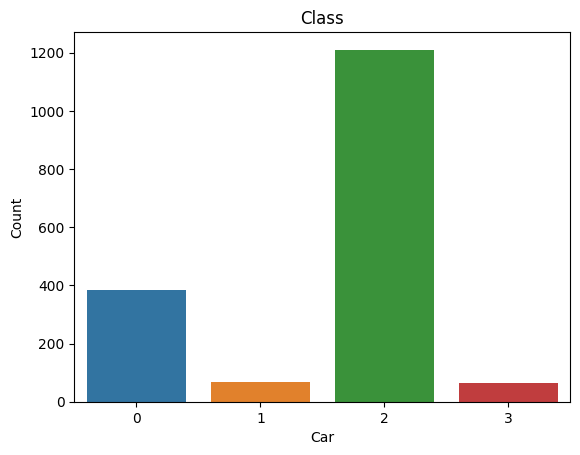

In [6]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.xlabel("Car")
plt.ylabel("Count")
plt.title("Class")

In [7]:
# 결측치 확인
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [8]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [9]:
X=df.drop('class', axis=1)
# class 컬럼 삭제하여 X에 저장, axis=1 이면 y축 기준
X.head()
# head()는 첫 5행만 출력함

,buying,maint,doors,persons,lug_boot,safety
0,1.341641,1.341641,-1.341641,-1.224745,1.224745,0.000000
1,1.341641,1.341641,-1.341641,-1.224745,1.224745,1.224745
2,1.341641,1.341641,-1.341641,-1.224745,1.224745,-1.224745
3,1.341641,1.341641,-1.341641,-1.224745,0.000000,0.000000
4,1.341641,1.341641,-1.341641,-1.224745,0.000000,1.224745


In [10]:
y=df['class']
y.value_counts()

2    1210
0     384
1      69
3      65
Name: class, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,buying,maint,doors,persons,lug_boot,safety
520,-1.341641,1.341641,1.341641,-1.224745,-1.224745,1.224745
621,-1.341641,-1.341641,1.341641,-1.224745,1.224745,0.000000
1017,0.447214,-1.341641,-0.447214,1.224745,1.224745,0.000000
1273,0.447214,-0.447214,1.341641,-1.224745,0.000000,1.224745
924,0.447214,1.341641,0.447214,-1.224745,-1.224745,0.000000
...,...,...,...,...,...,...
835,-1.341641,-0.447214,0.447214,1.224745,-1.224745,1.224745
1216,0.447214,-0.447214,-0.447214,-1.224745,1.224745,1.224745
1653,-0.447214,-0.447214,-0.447214,-1.224745,-1.224745,0.000000
559,-1.341641,-1.341641,-1.341641,1.224745,1.224745,1.224745


In [12]:
X_train.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [13]:
#X_train의 특성 개수
X_train.shape[1]

6

In [14]:
y_train

520     2
621     2
1017    2
1273    2
924     2
       ..
835     0
1216    2
1653    2
559     2
684     2
Name: class, Length: 1296, dtype: int32

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [16]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test) 
#예측한 값을 pred_lr에 저장

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
#예측한 값과 실제 값을 비교
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.6527777777777778
[[ 11   0  84   4]
 [  1   0  20   0]
 [ 25   0 268   3]
 [  4   0   9   3]]


In [17]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9768518518518519
[[ 92   4   3   0]
 [  0  21   0   0]
 [  2   0 294   0]
 [  1   0   0  15]]
